# ECON408: Midterm Practice Problems

Jesse Perla, UBC

## Student Name/Number: (doubleclick to edit)

### Instructions

The following are example directions for an exam.

-   Ensure you modify the field above with your **name and student
    number above immediately**
-   The exam has **XXXXX questions**, each with multiple parts for a
    total of **XXXXX points**. You may not finish the exam, so best to
    do your best answering all questions to the extent possible and not
    get stuck on any one question.
-   **Execute the file** to begin, which will also check your setup. To
    do this in Jupyter, in the menu go `> Run > Run All Cells` or the
    equivalent buttons
-   Edit this file directly, and in-place as an `ipynb` file, which we
    will automatically download at the end of the exam time directly. In
    particular
    -   **DO NOT** rename this file with your name. It is automatically
        associated with your canvas account
    -   **DO NOT** save-as the file, move it, or export to pdf or html
    -   **DO NOT** add any additional packages
-   **Save** the notebook as you are working
    -   We will only grade what is saved at the end of the exam in this
        exact file, and it is your responsibility to ensure the file is
        saved
    -   We will **not** execute the notebook, so ensure all code,
        figures, etc. are ready as-is upon saving for submission
-   Ensure you **edit the results in the code blocks or markup blocks
    indicated** as we will not grade anything outside of those
    -   You will not be judged on code quality directly, but code
        clarity may be required for us to ensure you understood the
        problem directly
    -   If a question requires math, you can try to put latex inside of
        the cells but will not be judged on whether you write latex
        vs. math in text that doesn’t quite match latex. But it should
        be clear
-   The exam is **closed book** except for a **one page, one-sided
    cheat-sheet** with anything on it.
    -   If you need to look up any documentation for a function in the
        Jupyterhub menu, use `Settings/Show Contextual Help`, and then
        select the function of interest.
-   Accessing the internet **is not permitted**, though feel free to use
    the internal help in Jupyter.

In [28]:
# Packages available
# DO NOT MODIFY OR ADD PACKAGES
using Distributions, Plots, LaTeXStrings, LinearAlgebra, Statistics, Random

## Short Question 1

Given a stochastic process $X_t$, write a paragraph describe what
economists mean by rational expectations? Explain this from the context
of an agent making forecasts and biases in their forecasts.

When economist refer to rational expectations this refers to the notion of agents making accurate forecast with no biases. Given a variable to predict $X_t$, a agent would forecast the Expected value $\mathbb E(X_t)$

## Short Question 2

Explain what a power-law tail means for a CDF $F(x)$ and counter-cdf
$1-F(x)$. For a stochastic process $X_t$, what features of that
stochastic process might lead to a power-law tail in the stationary
distribution?

A power law indicates the probability of observing extreme values is higher than a standard normal distribution. The extreme values lead to "fat" tails against a standard normal distribution. The probability of observing a value $X$ is proportional to $X^{(-\alpha)}$. In the context of CDF and CCDF this would mean the probability of observing extreme values decreases slowly as compared to a nromal distribution. A factor that could lead to power law tail distribution is economies of scale, an example would be wealth. The wealth you can attain is proportional to the wealth you already have. 


## Short Question 3

What is a state space model? Explain what type of problem a Kalman
Filter solves. What are the key assumptions on the stochastic processes,
priors, etc. that make it applicable?

A state space model is a model that represents a evolving system composed of two components, the theoreitcal state equation and the empirical observation equation. Both equations have a associate random variable that results in error. As a result we do not know the true state of our variable. The Kalman filter solves this by incorporating both equations such that we may arrive to a better forecast of the true variable. The key assumptions would be the linearirty of the equation, gaussian assumption and the markovian property. Such that the errors are 0 and that the current observation contains all the information needed to predict future states.

## Short Question 4

What is the definition of a Martingale? Take the following stochastic
process

$$
X_{t+1} = a + X_t + \epsilon_{t+1}
$$ for some $\epsilon_{t+1}$ which is IID. What values of $a$ and
properties of $\epsilon_{t+1}$ would make this a martingale? If the
variance of $\epsilon_{t+1}$ is $\sigma^2$, then in that case would you
expect there to be a stationary distribution? Why or Why not?

Martinegale is defined by $\mathbb E(X_{t+1}|F_t)=X_t$. For this equation to be martingale a needs to be 0 and $\epsilon_{t+1}$ would need to have a distribution that has constant mean and variance, such as a normal distribution. If $\sigma^2$ is the variance, given a nromal distribution we would expect a stationary distribution because a normal distribution has a contatnt mean and variance therefore it must be that $\mathbb E(X_{t+1}|F_t)=X_t$

## Question 1

Following the notes on [AR(1)
processes](https://julia.quantecon.org/introduction_dynamics/ar1_processes.html)
rather than plotting the distribution as normal instead lets see what
the stationary distribution looks like with simulation.

### Part (a)

From $X_0 = 1.0$ simulate up to $T=2000$ using the process

$$
X_t = a X_{t-1} + b + c W_t
$$

Where $a=0.98, b=0.1, c=0.02$.

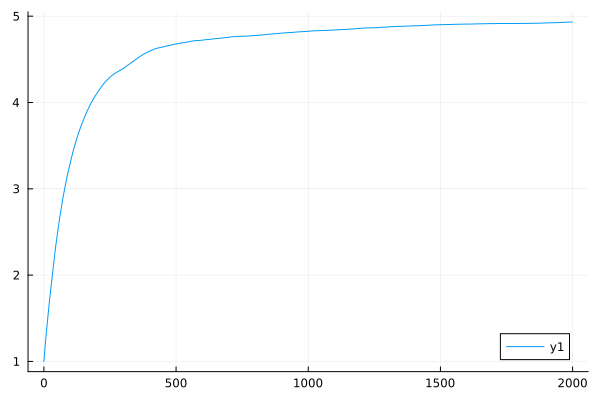

In [39]:
T = 2000
x_0 = 1.0
a = 0.98
b = 0.1
c = 0.02


x=zeros(T)
x[1]=x_0
for t in 2:(T)
    x[t]=a*x[t-1]+b+c*rand(Normal())
end


x_means = cumsum(x)./(1:(T))
plot(0:T-1, x_means;)

### Part (b)

On the same graph plot the histogram of those simulated values (i.e.,
$\{X_0, \ldots X_T\}$) then plot the density of the stationary
distribution calculated in closed from in [those
notes](https://julia.quantecon.org/introduction_dynamics/ar1_processes.html#equation-mu-sig-star)
(i.e. create a normal distribution with $\mu^* = b/(1-a)$ and
$v^* = c^2/(1 - a^2)$

Hint: `histogram(X, normed=true)` normalizes the empirical draws so they
are a proper PMF.

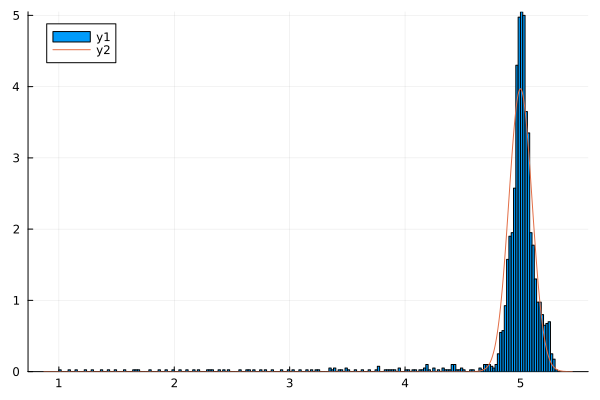

In [60]:
histogram(x,normed=true)
dist=Normal(b/(1-a),c/sqrt(1-a^2))
plot!(x->pdf(dist,x))


### Part (c)

Now, do the same plot using the 10th to 500th observations (i.e.,
$\{X_{10}, \ldots X_{500}\}$)

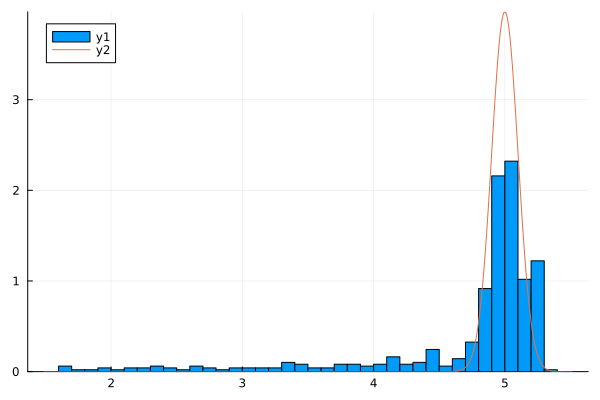

In [63]:
histogram(x[10:500],normed=true)
plot!(x->pdf(dist,x)) 

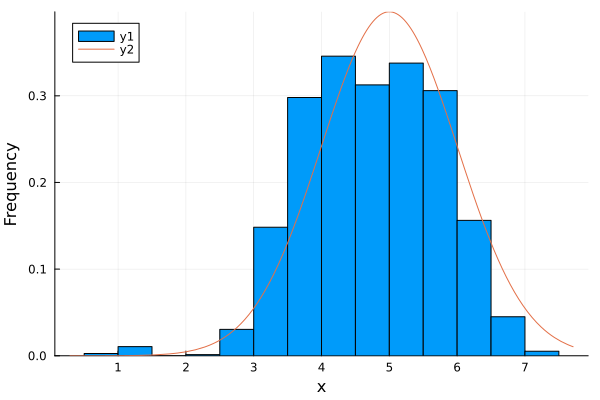

In [67]:
x_cut = vcat(x[1:10], x[501:end])
histogram(x_cut, xlabel="x", ylabel="Frequency", normed=true)
plot!(x->pdf(dist,x))   


And then a separate plot using the rest

Compare how these line? Explain why each is better or worse?

(double click to edit your answer)

### Part (d)

Change the `c` parameter to be `0.2`.

Now repeat the display of the two histograms (1) split of the 10th to
500th ; and (2) the remainder

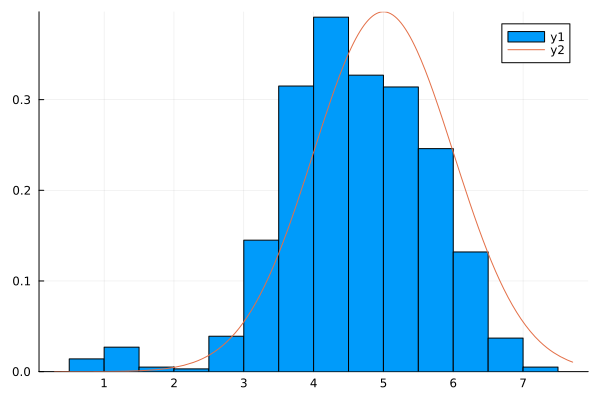

In [66]:
T = 2000
x_0 = 1.0
a = 0.98
b = 0.1
c = 0.2


x=zeros(T)
x[1]=x_0
for t in 2:(T)
    x[t]=a*x[t-1]+b+c*rand(Normal())
end


histogram(x,normed=true)
dist=Normal(b/(1-a),c/sqrt(1-a^2))
plot!(x->pdf(dist,x))

histogram(x[10:500],normed=true)
plot!(x->pdf(dist,x)) 


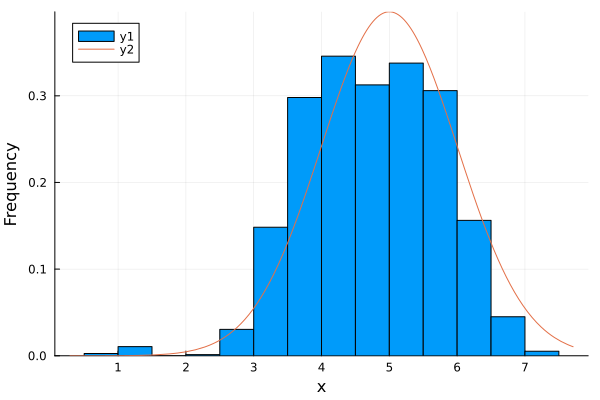

In [68]:
x_cut = vcat(x[1:10], x[501:end])
histogram(x_cut, xlabel="x", ylabel="Frequency", normed=true)
plot!(x->pdf(dist,x))   


Compare this to part (d)? Has the results changed and if so, then why?

(double click to edit your answer)

## Question 2

In this problem we will examine wealth dynamics for a simpler setup. Log
income, $\log y_t$ follows an AR(1) process,

$$
\log y_{t+1} = \mu_y + \rho_y \log y_t + \sigma_y \epsilon_{1,t+1}
$$

and

$$
\log R_{t+1} = \mu_r + \sigma_r \epsilon_{2,t+1}
$$

where $\epsilon_{1,t+1} \sim N(0,1)$ and $\epsilon_{2,t+1} \sim N(0,1)$
are IID shocks.

As in the wealth dynamics problem from before, the evolution of wealth
is given by

$$
w_{t+1} = R_{t+1}s(w_t) + y_{t+1}
$$

where $s(w_t)$ is the exogenously given savings function from before,

$$
s(w) =  s_0 w \cdot \mathbb 1\{w \geq \hat w\} = \begin{cases} s_0 w & w \geq \hat{w}\\
0 & w < \hat{w}
\end{cases}
$$

For a constant $s_0 \in (0,1)$ which is savings rate and $\hat{w}\geq 0$
is a minimum wealth threshold below which they do not save and instead
consumer all of their income (since $w_{t+1} = y_{t+1}$ in that case).

As before, take the lorenz and gini code as given,

In [38]:
function lorenz(v)  # assumed sorted vector
    S = cumsum(v)  # cumulative sums: [v[1], v[1] + v[2], ... ]
    F = (1:length(v)) / length(v)
    L = S ./ S[end]
    return (; F, L) # returns named tuple
end
# Assumes that v is sorted!
gini(v) = (2 * sum(i * y for (i,y) in enumerate(v))/sum(v)
           - (length(v) + 1))/length(v)

gini (generic function with 1 method)

Take the following simpler structure for holding the parameters of the
model

In [39]:
function simple_wealth_dynamics_model(;
                 w_hat=1.0, # savings parameter
                 s_0=0.75, # savings parameter
                 mu_y=0.1, # labor income parameter
                 sigma_y=0.1, # labor income parameter
                 rho_y=0.9, # labor income parameter
                 mu_r=0.0, # rate of return parameter
                 sigma_r=0.2, # rate of return parameter
                 )
    return (;w_hat, s_0, mu_y, sigma_y, rho_y, mu_r, sigma_r)
end

simple_wealth_dynamics_model (generic function with 1 method)

and a modified version of the `simulate_panel` function

In [40]:
function simulate_panel(N, T, p; y_0 = p.mu_y/(1-p.rho_y), w_0 = p.mu_y/(1-p.rho_y))
    # Setup initial conditions
    w = w_0 * ones(N) # start at same w_0
    logy = log.(y_0 * ones(N)) # start at same y_0
    logR = zeros(N) # not used in this exact example, but could be generalized
    
    # Preallocate next period states and R intermediates
    w_p = similar(w)
    logR_p = similar(w)
    logy_p = similar(w)    


    # Temporary used in calculations
    savings_proportion = similar(w) # include constant and R_{t+1}

    for t in 1:T
        R_shock = randn(N)
        y_shock = randn(N)
        @inbounds for i in 1:N
            logy_p[i] = p.mu_y + p.rho_y*logy[i] + p.sigma_y*y_shock[i]
            logR_p[i] = p.mu_r + p.sigma_r*R_shock[i] # no autocorrelation but could reference logR[i]
            savings_proportion[i]  = (w[i] >= p.w_hat) ? p.s_0 * exp(logR_p[i]) : 0.0
            w_p[i] = savings_proportion[i]*w[i] + exp(logy_p[i])
        end
        # Step forward
        w .= w_p
        logy .= logy_p
        logR .= logR_p
    end    
    sort!(w) # sorts the wealth so we can calculate gini/lorenz        
    F, L = lorenz(w)
    return (;w, y = exp.(logy_p), F, L, gini = gini(w))
end

simulate_panel (generic function with 1 method)

The following code shows a basic simulation,

In [41]:
p = simple_wealth_dynamics_model()# Or simple_wealth_dynamics_model(;w_hat = 2.0) to swap out a single parameter, etc.
N = 10_000
T = 200
w_0 = 10.0

res = simulate_panel(N, T, p; w_0) # uses the default y_0 but overrides the w_0 default
@show res.gini, mean(res.w), mean(res.y); # show some of the results

(res.gini, mean(res.w), mean(res.y)) = (0.17244894615165232, 11.91274391828902, 2.7973392035944027)


### Part (a)

Using the above code and default parameter values, simulate the model to
see the difference in the gini coefficients where you change the
variance on the returns `sigma_r` 10 points between `0.0` to `0.3`.

Using your simulations, plot the gini coefficient as a function of
`sigma_r` and comment on the results.

In [42]:
# Modify/add code here, creating new cells as required
sigma_r_values = range(0.0, 0.3, 10)
N = 10_000
T = 200

# simple_wealth_dynamics_model(;sigma_r = sigma_r_values[1]) # etc. to create modified models
res = simulate_panel(N, T, simple_wealth_dynamics_model(;sigma_r = sigma_r_values[end]);w_0) # for example, this swaps the sigma_r with the last value in the range
@show res.gini;

    

res.gini = 0.23351694419263366


0.23351694419263366

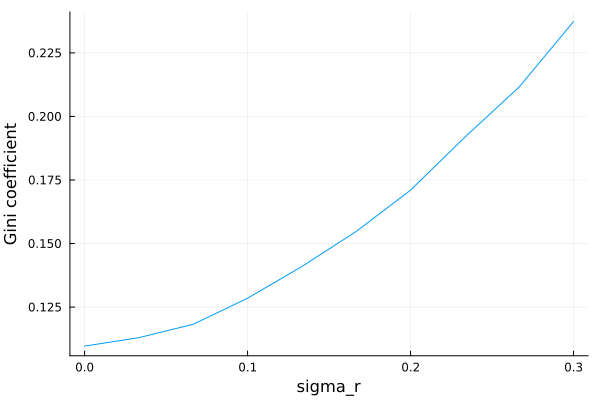

In [43]:


gini_values = []
for sigma_r in sigma_r_values
    res = simulate_panel(N, T, simple_wealth_dynamics_model(;sigma_r = sigma_r);w_0)
    push!(gini_values, res.gini)
end

plot(sigma_r_values, gini_values, xlabel="sigma_r", ylabel="Gini coefficient", legend=false)


In [44]:
gini_values

10-element Vector{Any}:
 0.10966761550629199
 0.11298479115156897
 0.11825633482609282
 0.1284978993014798
 0.14097746970423922
 0.15475508334392563
 0.17101456775466414
 0.1918501846823012
 0.21159654857670449
 0.23732506337781833

Can you provide a brief interpretation of the results?

as sigma r increases we see increase wealth inequality

### Part (b)

Now, take the same model and lets shut off all variation on the income
process to leave it as a fixed value so $y_{t+1} = y_t$ by setting
`sigma_y = 0, rho_y = 1, mu_y = 0` and then initializing all of the
agents with the `y_0  = 5.0` and `w_0 = 2.0`

Calculate the gini coefficient for the same range of `sigma_r` values as
above and plot the results.

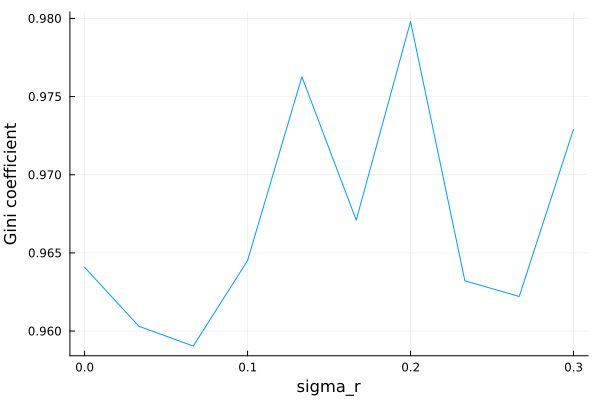

In [69]:
 # Modify/add code here, creating new cells as required
p = simple_wealth_dynamics_model(;sigma_y = 0.0, rho_y = 1.0, mu_y = 0.0)
N = 10_000
T = 1000
y_0 = 5.0
w_0 = 2.0
# res = simulate_panel(N, T, p; y_0, w_0)  # adapt this, passing in the y_0 and w_0
res = simulate_panel(N, T, p; y_0, w_0)

gini_values = []
for sigma_r in sigma_r_values
    res = simulate_panel(N, T, simple_wealth_dynamics_model(;sigma_r = sigma_r, rho_y = 1.0, mu_y = 0.0);y_0,w_0)
    push!(gini_values, res.gini)
end

plot(sigma_r_values, gini_values, xlabel="sigma_r", ylabel="Gini coefficient", legend=false)


Can you provide a brief interpretation of the results?

(double click to edit your answer)